In [1]:
import matplotlib.pyplot as plt
import numpy as np
import importlib
import pandas as pd
import vecenvs
from stable_baselines3 import A2C, PPO

importlib.reload(vecenvs)

plt.rcParams['figure.dpi'] = 256
plt.rcParams['text.usetex'] = True
plt.rcParams['animation.ffmpeg_path'] = '/Applications/ffmpeg'

setup_name = 'test'

node_df = pd.read_csv(f'supplychains/{setup_name}/nodes.csv')
edge_df = pd.read_csv(f'supplychains/{setup_name}/edges.csv')

max_time = 2500

supply_nodes = np.array([7, 8])
supply_amounts = 10 * np.random.poisson(10, size=(2, max_time))
supply_prices = 1 * np.ones(shape=(2, max_time))

demand_nodes = np.array([0])
demand_amounts = 10 * np.random.poisson(10, size=(1, max_time))
demand_prices = 30.0 * np.ones(shape=(1, max_time))

supplies = (supply_nodes, supply_amounts, supply_prices)
demands = (demand_nodes, demand_amounts, demand_prices)

num_envs = 1

env = vecenvs.VectorisedSupplyChain(node_df, edge_df, supplies, demands, max_time, num_envs, update_interval=250)
#env = envs.VectorisedSupplyChain(node_df, edge_df, 200)

model = PPO('MlpPolicy', env, verbose=0, n_steps=5)
num_episodes = 100

rewards = np.zeros(shape=(num_episodes, num_envs, env.max_time, env.num_nodes))

for episode in range(num_episodes):
    env.reset()
    model.learn(total_timesteps=max_time*num_envs)
    rewards[episode] = env.batch_node_profit_history
    print(f'Done episode {episode+1}/{num_episodes}')
    

/Users/max/Library/Python/3.9/lib/python/site-packages/tensorboard/compat/proto/histogram_pb2.py:18: DeprecationWarning: Call to deprecated create function FileDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
  DESCRIPTOR = _descriptor.FileDescriptor(
/Users/max/Library/Python/3.9/lib/python/site-packages/tensorboard/compat/proto/histogram_pb2.py:36: DeprecationWarning: Call to deprecated create function FieldDescriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_pool.
  _descriptor.FieldDescriptor(
/Users/max/Library/Python/3.9/lib/python/site-packages/tensorboard/compat/proto/histogram_pb2.py:29: DeprecationWarning: Call to deprecated create function Descriptor(). Note: Create unlinked descriptors is going to go away. Please use get/find descriptors from generated code or query the descriptor_po

250: -240.00 +/- 0.00
500: 1163.00 +/- 0.00
750: 719.80 +/- 0.00
1000: -409.10 +/- 0.00
1250: -2239.40 +/- 0.00
1500: -2703.70 +/- 0.00
1750: -536.80 +/- 0.00
2000: -234.40 +/- 0.00
2250: 3460.90 +/- 0.00
2500: -977.20 +/- 0.00
Done episode 1/10
250: -240.00 +/- 0.00
500: 96.60 +/- 0.00
750: 835.10 +/- 0.00
1000: -3086.70 +/- 0.00


KeyboardInterrupt: 

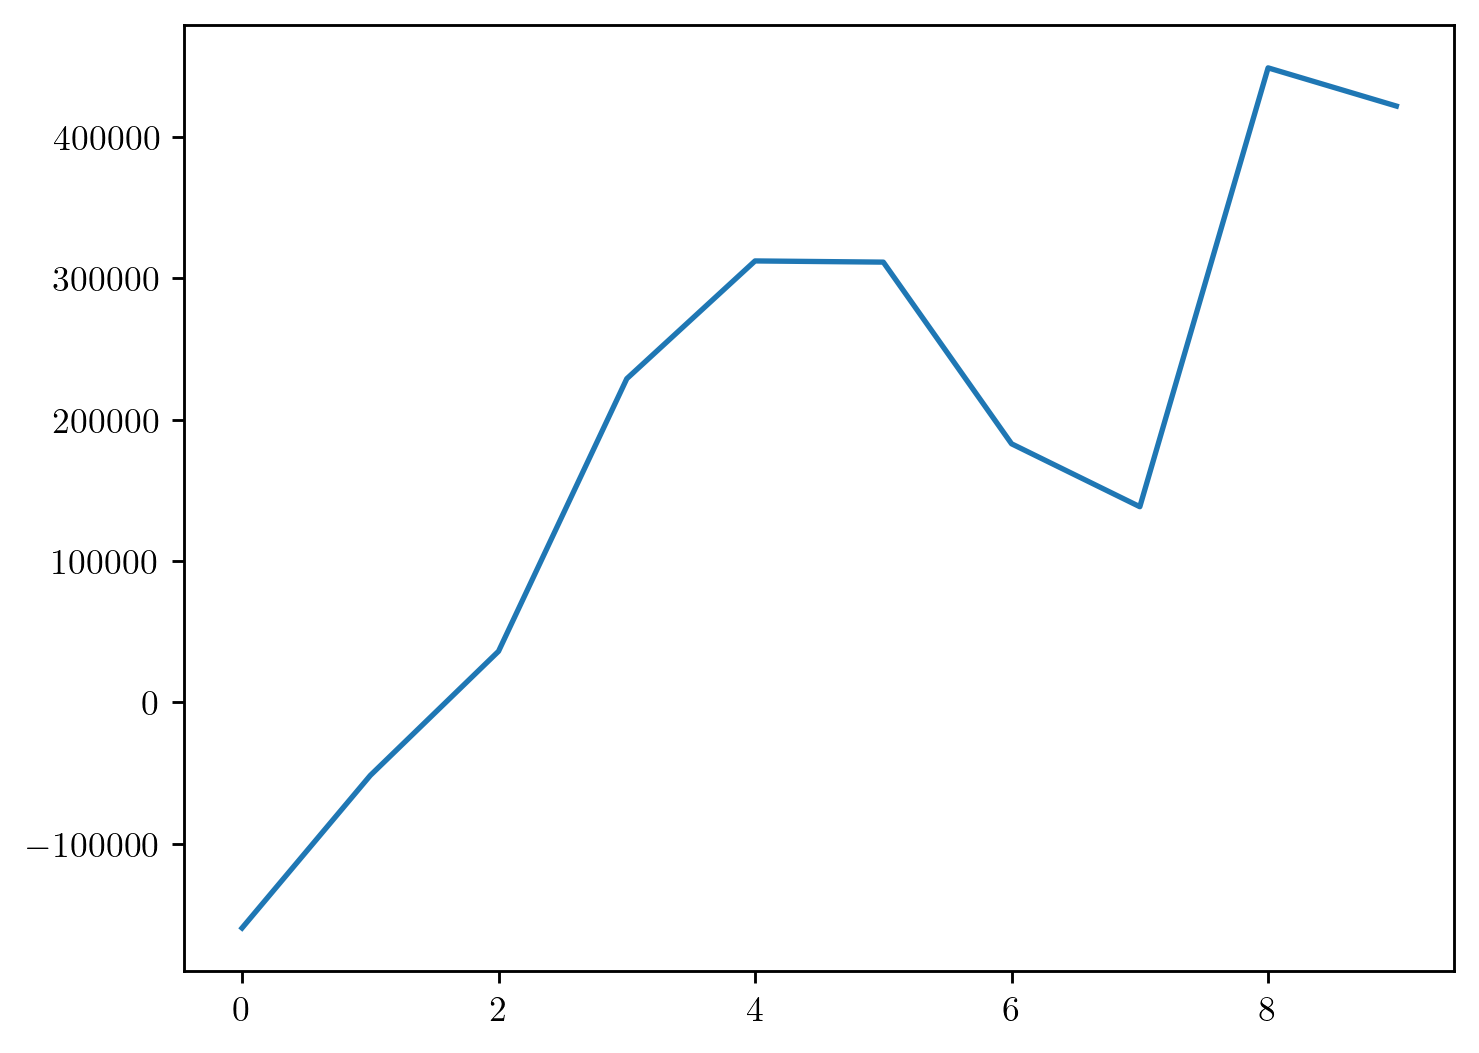

In [52]:
mean_reward = np.mean(rewards, axis=-1)
mean_reward = np.sum(mean_reward, axis=-1)
mean_reward = np.mean(mean_reward, axis=-1)

plt.plot(mean_reward)

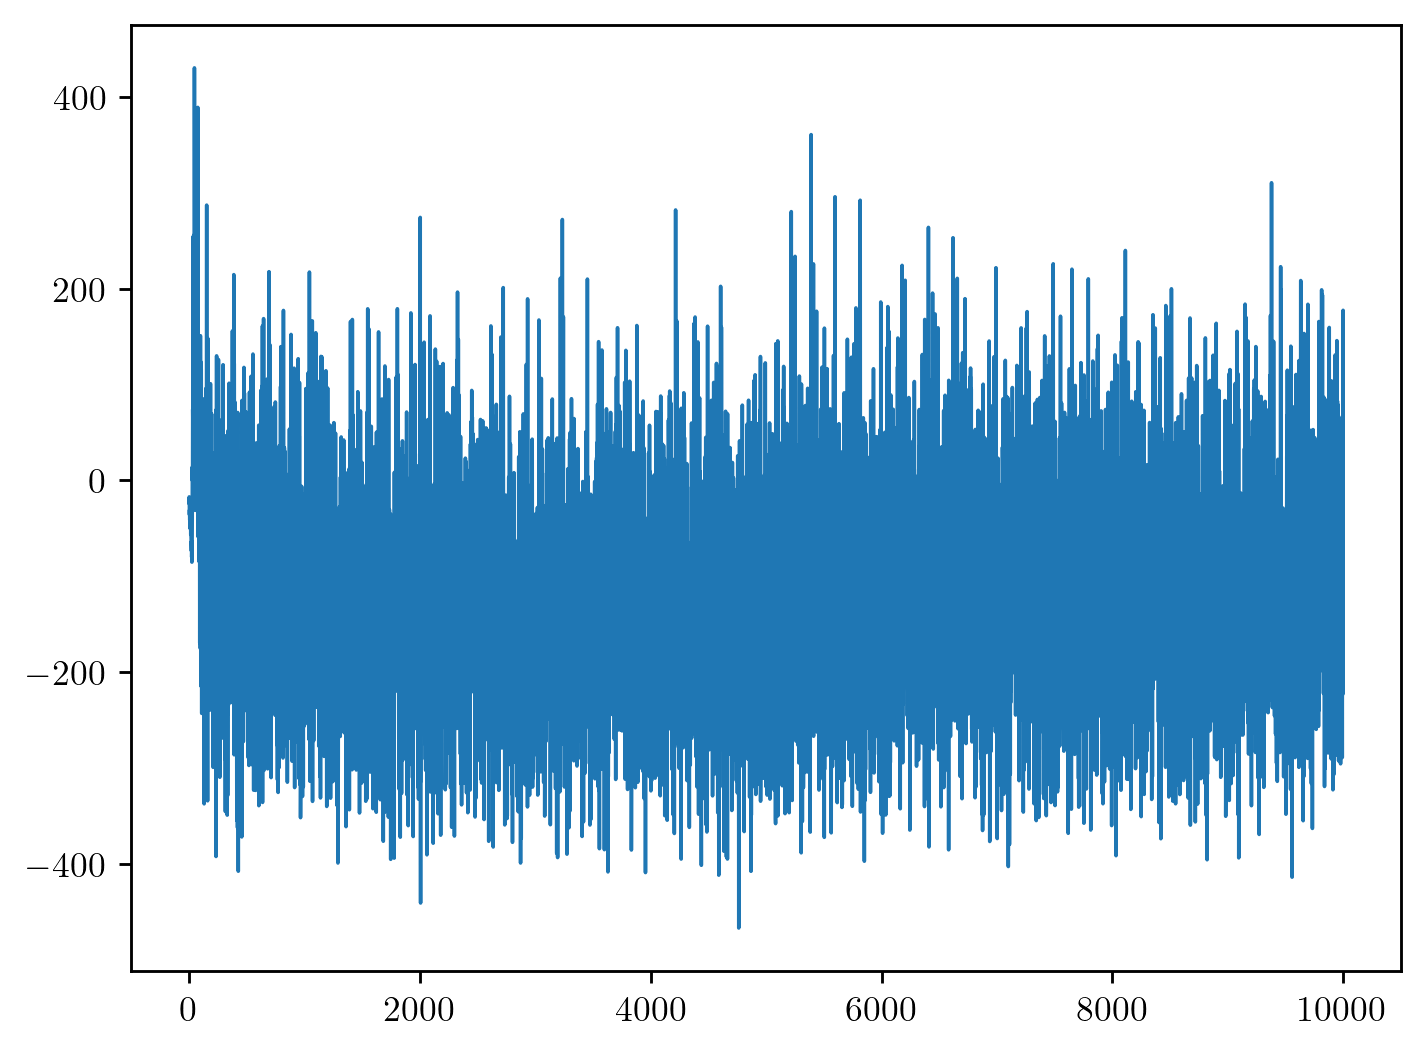

In [11]:
plt.plot(np.mean(env.batch_node_profit_history, axis=(0,2)), linewidth=1.0)

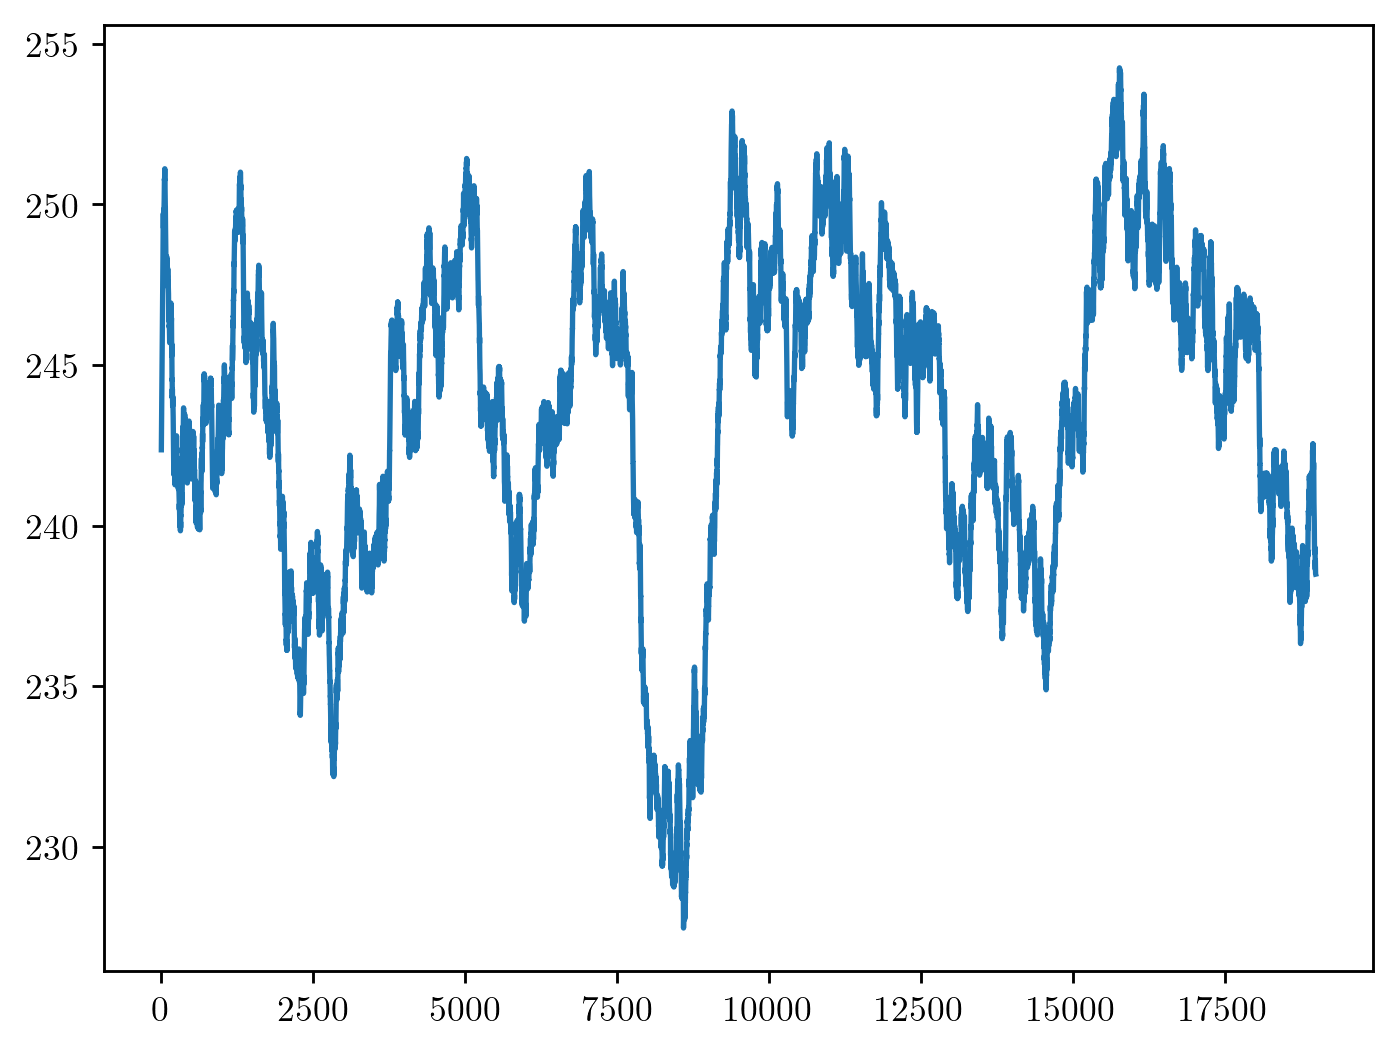

In [31]:
plt.plot(np.convolve(np.mean(env.batch_node_profit_history, axis=(0,2)), np.ones(1000)/1000, mode='valid'))

/Users/max/Documents/PeakAI/rl4sc/envs_copy.py:369: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


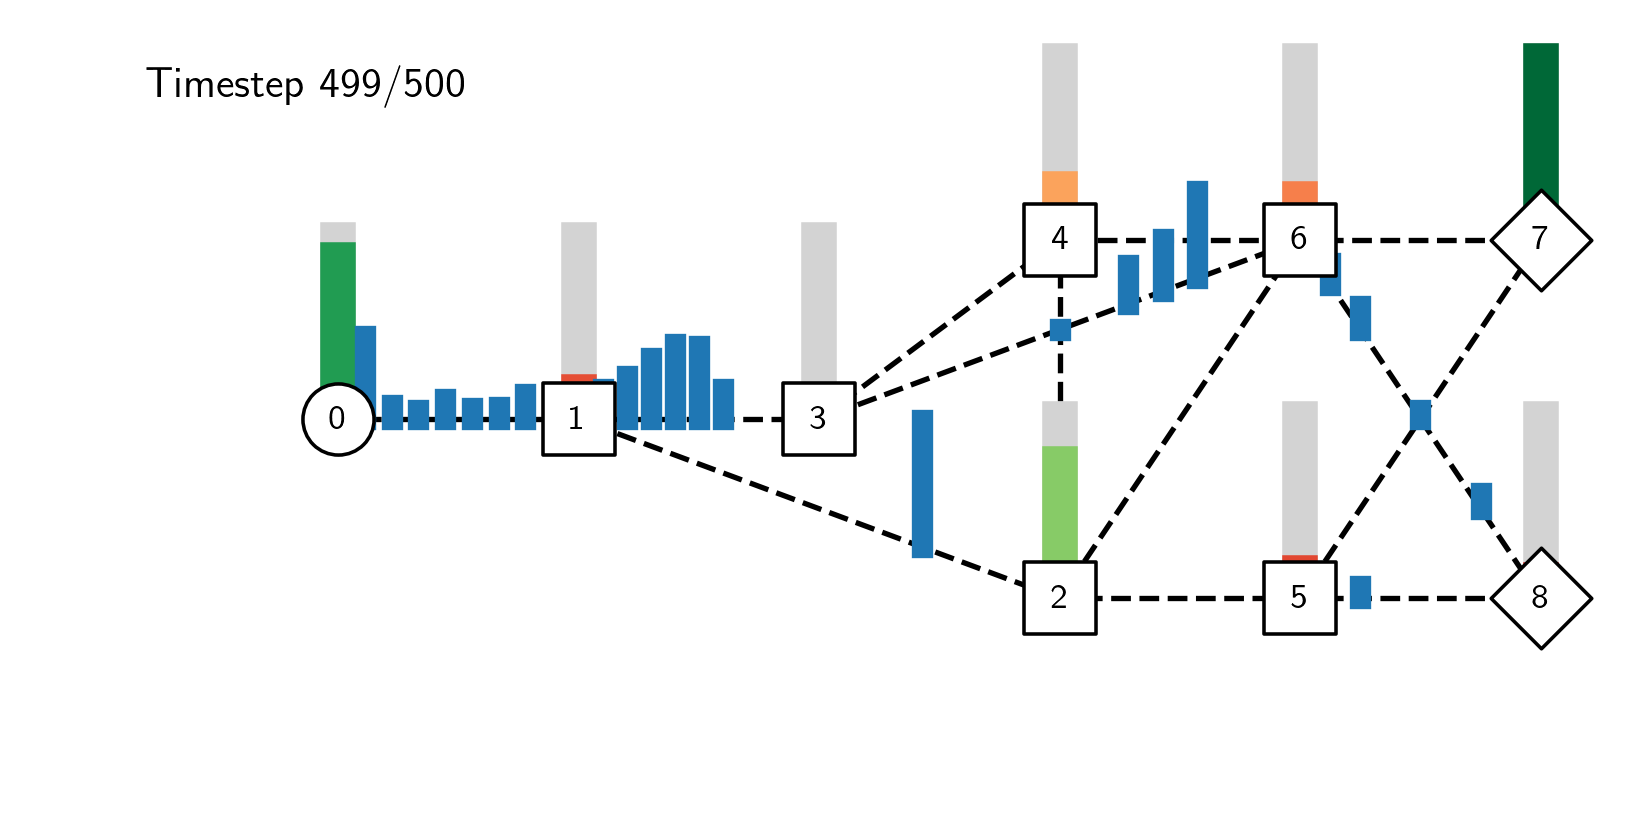

In [54]:
env.animate_history(0, 500, 'supplychains/test/0_500_vec.gif')